## Cargar y visualizar el dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import RidgeClassifier
# from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score
from sklearn.model_selection import ParameterGrid
# from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv('../data/dataset_encoded.csv')
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,1,168.805,36.60,1,1.0,0.0,0.0,1.0,0.0,0.0
1,0,80.0,0,1,1,0,105.920,32.50,1,1.0,0.0,0.0,0.0,1.0,0.0
2,1,49.0,0,0,1,1,168.805,34.40,1,1.0,0.0,0.0,0.0,0.0,1.0
3,1,79.0,1,0,1,0,168.805,24.00,1,0.0,1.0,0.0,0.0,1.0,0.0
4,0,81.0,0,0,1,1,168.805,29.00,1,1.0,0.0,0.0,1.0,0.0,0.0
5,0,74.0,1,1,1,0,70.090,27.40,1,1.0,0.0,0.0,0.0,1.0,0.0
6,1,69.0,0,0,0,1,94.390,22.80,1,1.0,0.0,0.0,0.0,1.0,0.0
7,1,78.0,0,0,1,1,58.570,24.20,1,1.0,0.0,0.0,0.0,0.0,0.0
8,1,81.0,1,0,1,0,80.430,29.70,1,1.0,0.0,0.0,0.0,1.0,0.0
9,1,61.0,0,1,1,0,120.460,36.80,1,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
X = df.drop("stroke", axis=1)
y = df["stroke"]
print(X.shape)

(4981, 14)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Distribución original en y_train:", Counter(y_train))

Distribución original en y_train: Counter({0: 3786, 1: 198})


In [5]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Después de aplicar SMOTE:", Counter(y_train_res))

Después de aplicar SMOTE: Counter({0: 3786, 1: 3786})


In [14]:
params = {

    # 'RandomForestClassifier': {'n_estimators': [100], # Already proved 100 and 50 
    #                          'max_depth': [20], # 5, 10
    #                          'min_samples_split': [7], # 5, 3
    #                          'min_samples_leaf': [4], # 2
    #                          'max_features': ['sqrt'],
    #                          'bootstrap': [True],
    #                          'random_state': [42]},
    
    # 'KNeighborsClassifier': {'n_neighbors': [7],
    #                          'weights': ['uniform'],
    #                          'metric' : ['minkowski']},

    #  'GradientBoostingClassifier': {'n_estimators': [400], # Already proved 100 and 200 good params 
    #                               'learning_rate': [0.5], # 0.1, 0.3
    #                               'max_depth': [20], # 5, 10
    #                               'min_samples_split': [10], # 5, 8
    #                               'min_samples_leaf': [8], # 2, 4
    #                               'subsample': [1], # 0.8
    #                               'max_features': ['sqrt'],
    #                               'random_state': [42]},

    #  'LGBMClassifier': {'n_estimators': [110], # Already proved 100, 120 and 110
    #                  'learning_rate': [0.1], # 0.05, 0.08
    #                  'num_leaves': [26], # 31, 22, 28
    #                  'max_depth': [-1],
    #                  'min_child_samples': [20], # 20
    #                  'subsample': [0.9], # 0.8, 0.5
    #                  'colsample_bytree': [0.9], # 0.8, 0.5
    #                  'random_state': [42]},

    # 'RidgeClassifier': {'alpha': [1.0],
    #                     'random_state': [42]},

     'XGBClassifier': {'n_estimators': [200], # Already proved 100, 120 and 105
                     'learning_rate': [1], # 0.05, 0.02
                     'max_depth': [16], # 5, 2, 8
                     'subsample': [1], # 0.8, 0.6, 1
                     'colsample_bytree': [1], # 0.8, 0.6, 1
                     'gamma': [0],
                     'reg_alpha': [0.10], # 0.1, 0.05
                     'reg_lambda': [1],
                     'use_label_encoder': [False],
                     'eval_metric': ['logloss'],
                     'random_state': [42]},

    # 'GaussianNB': {},
}

In [15]:
import mlflow 
import mlflow.sklearn

models = {
    # 'KNN': KNeighborsClassifier(),
    # 'GradientBoosting': GradientBoostingClassifier(),
    # 'RandomForestClassifier' : RandomForestClassifier(),
    # 'Ridge': RidgeClassifier(),
    # 'Naive Bayes': GaussianNB(),
    'XGBClassifier': XGBClassifier(),
    # 'LGBMClassifier': LGBMClassifier()
}

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Eighth Parameter Tuning")

resultados = []

for nombre_modelo, modelo in models.items():
    grid = params.get(nombre_modelo, [{}])
    for param_set in ParameterGrid(grid):
        print(f"\nEntrenando {nombre_modelo} con parámetros: {param_set}")
        modelo.set_params(**param_set)
        modelo.fit(X_train_res, y_train_res)

        y_train_pred = modelo.predict(X_train_res)
        y_test_pred = modelo.predict(X_test)

        acc_train = accuracy_score(y_train_res, y_train_pred)
        acc_test = accuracy_score(y_test, y_test_pred)

        f1_train = f1_score(y_train_res, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        acc_gap = acc_train - acc_test
        f1_gap = f1_train - f1_test

        report = classification_report(y_test, y_test_pred, output_dict=True)

        recall_clase_0 = report['0']['recall']
        recall_clase_1 = report['1']['recall']

        resultados.append({
            'Modelo': nombre_modelo,
            'Accuracy (train)': round(acc_train, 4),
            'Accuracy (test)': round(acc_test, 4),
            'Overfitting (acc)': round(acc_gap, 4),
            'F1-score (train)': round(f1_train, 4),
            'F1-score (test)': round(f1_test, 4),
            'Overfitting (f1)': round(f1_gap, 4),
        })

        # MLflow logging
        with mlflow.start_run(run_name=f"{nombre_modelo}"):
            mlflow.log_param("modelo", nombre_modelo)
            mlflow.log_params(param_set)
            mlflow.log_metric("accuracy_train", acc_train)
            mlflow.log_metric("accuracy_test", acc_test)
            mlflow.log_metric("f1_train", f1_train)
            mlflow.log_metric("f1_test", f1_test)
            mlflow.log_metric("acc_gap", acc_gap)
            mlflow.log_metric("f1_gap", f1_gap)
            mlflow.log_metric("recall", recall_score(y_train_res, y_train_pred, average='weighted'))
            mlflow.log_metric("recall_0", recall_clase_0)
            mlflow.log_metric("recall_1", recall_clase_1)

            # Registrar modelo en MLflow (automáticamente con sklearn)
            mlflow.sklearn.log_model(modelo, "modelo")

2025/06/09 09:20:13 INFO mlflow.tracking.fluent: Experiment with name 'Eighth Parameter Tuning' does not exist. Creating a new experiment.
c:\Users\Michael Lopez\Desktop\brainstroke-navm\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:20:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Entrenando XGBClassifier con parámetros: {'colsample_bytree': 1, 'eval_metric': 'logloss', 'gamma': 0, 'learning_rate': 1, 'max_depth': 16, 'n_estimators': 200, 'random_state': 42, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1, 'use_label_encoder': False}


2025/06/09 09:20:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/403520193592185133/runs/d061220854e44e27a1815c46aee88be1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/403520193592185133


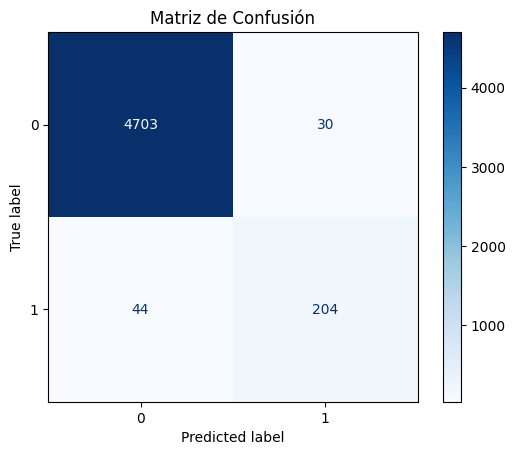

Reporte de Clasificación:
              precision    recall  f1-score   support

           0      0.991     0.994     0.992      4733
           1      0.872     0.823     0.846       248

    accuracy                          0.985      4981
   macro avg      0.931     0.908     0.919      4981
weighted avg      0.985     0.985     0.985      4981

Accuracy general: 0.985


In [11]:
import pickle
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score
)
import matplotlib.pyplot as plt

# === 1. Cargar el modelo ===
ruta_modelo = '../models/model2.pkl'  
with open(ruta_modelo, 'rb') as archivo:
    modelo = pickle.load(archivo)

# === 2. Cargar los datos de prueba ===
ruta_datos = '../data/dataset_encoded.csv'  
df = pd.read_csv(ruta_datos)

X_test = df.drop('stroke', axis=1)  
y_test = df['stroke']

# === 3. Hacer predicciones ===
y_pred = modelo.predict(X_test)

# === 4. Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# === 5. Métricas por categoría ===
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, digits=3))

# === 6. Accuracy global ===
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy general: {acc:.3f}')
